<a href="https://colab.research.google.com/github/hgabrali/Vehicle-Silhouette-Classification-for-Prospect-Auto/blob/main/MS_DATA_Vehicle_Silhouette_Classification_for_Prospect_Auto_Hande_GK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 Vehicle Silhouette Classification for Prospect Auto

[📈 Report & Figures](https://github.com/hgabrali/Vehicle-Silhouette-Classification-for-Prospect-Auto/edit/main/Report%20%26%20Figures.md)

 [MS Notes: EDA](https://github.com/hgabrali/EDA/tree/main)

 [MS Notes: Exploratory Data Analysis (EDA)](https://github.com/hgabrali/EDA/blob/main/Exploratory_Data_Analysis_(EDA).ipynb)


### 🎯 Project Goal
The primary goal of this project is to develop and evaluate a robust multiclass classification model capable of accurately distinguishing between three distinct vehicle types—Bus, Van, and Car—based solely on their two-dimensional geometric silhouettes. This model will be used by "Prospect Auto" repair shops to automate initial vehicle identification.

## 🚀 Technical Context

This repository hosts a practical implementation project within the **Master School Supervised Learning curriculum**. The focus is on applying a structured machine learning pipeline to a real-world multiclass classification problem.

---

| Aspect | Description ||
| :--- | :--- | :--- |
| **Learning Module** | **Supervised Learning** | 🧠🎓 |
| **Core Task** | **Multiclass Classification** | 🏷️🎯 |
| **Key Methodologies** | Exploratory Data Analysis (EDA), Feature Scaling, Model Training (e.g., Logistic Regression, Random Forest), Multiclass Metric Evaluation (Confusion Matrix, Macro/Weighted F1 Score). | ⚙️📈 |

## 📋 Data Description

The dataset utilizes **2D geometric features** extracted from vehicle silhouettes viewed from various angles. All features are continuous and numerical.

---

| Feature Type | Value Range | Details ||
| :--- | :--- | :--- | :--- |
| **Input Features** | 18 numerical columns (e.g., `compactness`, `circularity`, `hollows_ratio`). | These describe the shape of the vehicle silhouette; understanding their exact calculation is **not required**. | 📐🔢 |
| **Target Variable** (`class`) | Categorical (3 values). | `bus` (double decker), `van` (Cheverolet), or `car` (Saab 9000/Opel Manta). | 🎯🚗 |

# 💾 Project Data Source: Vehicle Silhouettes

The dataset for this project is the **Statlog (Vehicle Silhouettes) Dataset**. It is sourced from the **UCI Machine Learning Repository**, a standard archive for academic machine learning data.

Here is a breakdown of where to find the data and how to potentially load it in a Colab environment:

| Category | Source / Link | How to Access in Colab/Python |
| :--- | :--- | :--- |
| **Dataset Name** | **Statlog (Vehicle Silhouettes)** | This is the official name often used in literature. |
| **Primary Source (Download Link)** | **UCI Machine Learning Repository** | You can download the data file (often named `vehicle.dat` or similar) directly from the UCI archive. You will likely need to use pandas to read the raw text file, specifying the delimiter (usually whitespace or comma). |
| **Alternative Source 1 (Kaggle)** | **Kaggle** (If you prefer a direct CSV file) | A pre-cleaned version of the dataset is often available on Kaggle, which might simplify the initial loading step (e.g., `vehicle.csv`). |
| **Alternative Source 2 (UCI Fetch)** | **`ucimlrepo` library (Python)** | Recent UCI datasets can be fetched directly using the `ucimlrepo` package, which is ideal for a Colab environment. |

**Data Sourse:** [
Statlog (Vehicle Silhouettes)](https://archive.ics.uci.edu/dataset/149/statlog+vehicle+silhouettes)

In [1]:
# Installation (Run this in a Colab cell once)
!pip install ucimlrepo

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from ucimlrepo import fetch_ucirepo
import io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:

import gdown  # Import the gdown library

# --- 1. Data Loading from Google Drive URL ---

# The File ID from your share link:
# https://drive.google.com/file/d/1MnXNtmjQcFjAtM4IUrGlPY3_P820cRD3/view?usp=drive_link
file_id = "1MnXNtmjQcFjAtM4IUrGlPY3_P820cRD3"

# Define the local filename to save the downloaded file as
output_filename = "vehicle.csv"

# Download the file from Google Drive using its ID
# This will download the file to the Colab environment's local storage
try:
    gdown.download(id=file_id, output=output_filename, quiet=False)
    print(f"\nSuccessfully downloaded file: {output_filename}")
except Exception as e:
    print(f"Error downloading the file: {e}")
    print("Please ensure the file's sharing permissions are set to 'Anyone with the link can view'.")
    raise

# --- 2. Load Data into Pandas ---

# Load the dataset from the locally downloaded CSV file
df = pd.read_csv(output_filename)
print(f"Successfully loaded {output_filename} into DataFrame.")




Downloading...
From: https://drive.google.com/uc?id=1MnXNtmjQcFjAtM4IUrGlPY3_P820cRD3
To: /content/vehicle.csv
100%|██████████| 55.8k/55.8k [00:00<00:00, 16.7MB/s]


Successfully downloaded file: vehicle.csv
Successfully loaded vehicle.csv into DataFrame.


In [3]:
df_veh = df.copy()

## 2. 🔍 Exploratory Data Analysis (EDA)

The purpose of this phase is to gain a foundational understanding of the data's structure, identify potential issues (like missing values or imbalance), and visualize relationships before proceeding to modeling.

### 2.1. Structural and Statistical Check

We first check the data types, look for missing values, and review the descriptive statistics.


In [4]:
df_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
df_veh.nunique()

,0
compactness,44
circularity,27
distance_circularity,63
radius_ratio,134
pr.axis_aspect_ratio,37
max.length_aspect_ratio,21
scatter_ratio,131
elongatedness,35
pr.axis_rectangularity,13
max.length_rectangularity,66


In [6]:
df_veh.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [7]:
df_veh.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [8]:
df_veh.head(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


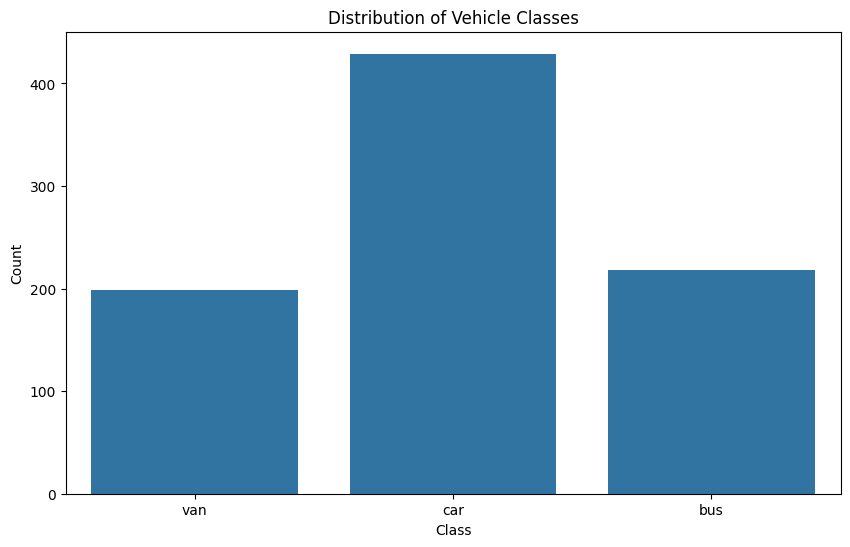

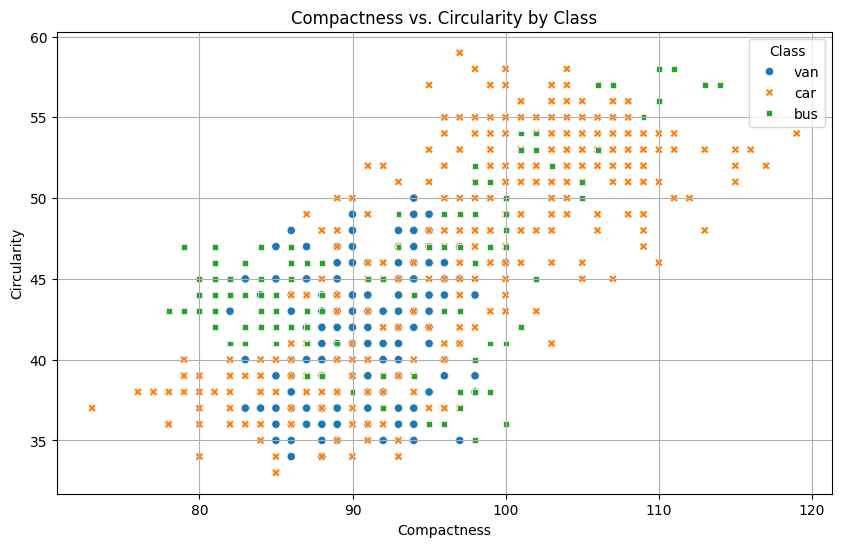

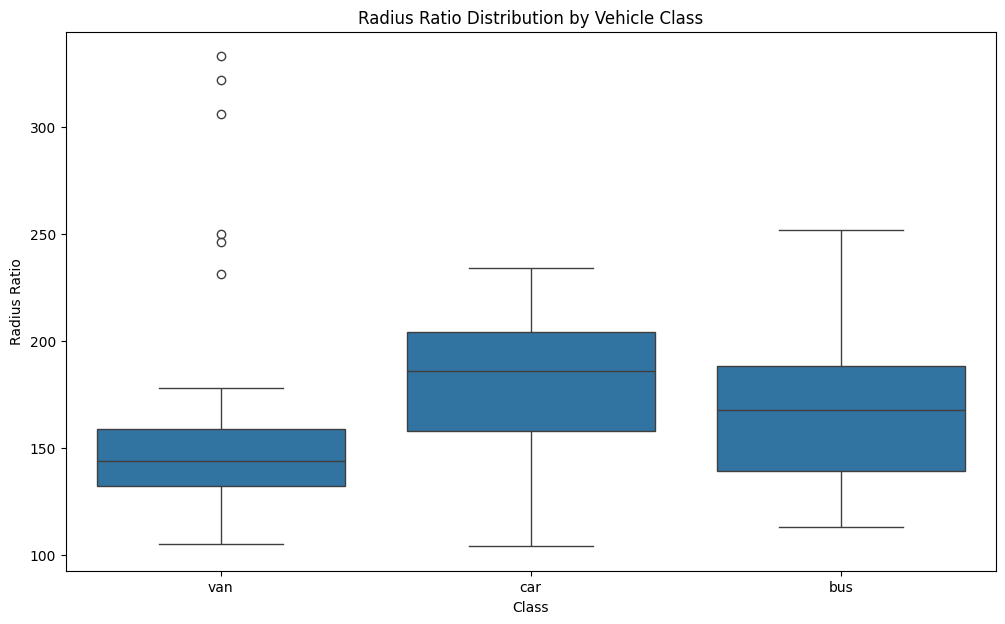

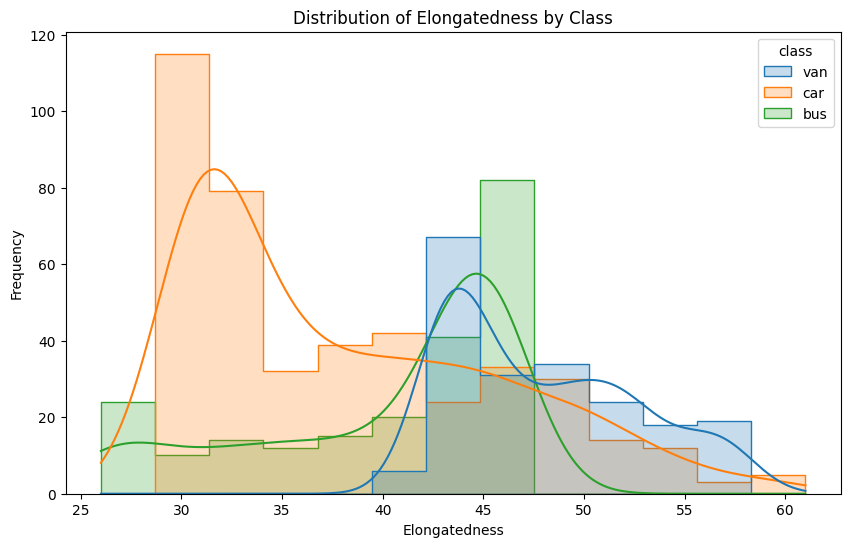

In [13]:

try:
    df_veh = pd.read_csv("vehicle.csv")
except FileNotFoundError:
    print("Error: vehicle.csv not found.")
    # As a fallback, try to use 'df' if it exists from a previous cell
    # This is a guess; ideally, the file load is correct.
    if 'df' in locals():
        df_veh = df
    else:
        print("Please ensure 'vehicle.csv' is loaded into 'df_veh'.")


# --- Graphing Codes (Phase 1) using 'df_veh' ---

# Check if df_veh was loaded successfully before plotting
if 'df_veh' in locals() and isinstance(df_veh, pd.DataFrame):

    # Graph 1: Class Distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_veh, x='class')
    plt.title('Distribution of Vehicle Classes')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

    # Graph 2: Scatter Plot for two features
    # (Using example features 'compactness' and 'circularity')
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_veh, x='compactness', y='circularity', hue='class', style='class')
    plt.title('Compactness vs. Circularity by Class')
    plt.xlabel('Compactness')
    plt.ylabel('Circularity')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()

    # Graph 3: Boxplot for a feature across classes
    # (Using example feature 'radius_ratio')
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df_veh, x='class', y='radius_ratio')
    plt.title('Radius Ratio Distribution by Vehicle Class')
    plt.xlabel('Class')
    plt.ylabel('Radius Ratio')
    plt.show()

    # Graph 4: Histogram / KDE Plot for a feature
    # (Using example feature 'elongatedness')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_veh, x='elongatedness', hue='class', kde=True, element="step")
    plt.title('Distribution of Elongatedness by Class')
    plt.xlabel('Elongatedness')
    plt.ylabel('Frequency')
    plt.show()

else:
    print("DataFrame 'df_veh' is not loaded. Cannot generate plots.")

# 1. 🔍 Exploring DataFrame Values

* This step focuses on identifying patterns, summarizing the data, and detecting potential issues like duplicates or anomalies.

# 2. ✂️ DataFrame Indexing and Slicing (.loc[] and .iloc[])
* This demonstrates how to precisely select rows and columns based on labels (.loc[]) and integer positions (.iloc[]).

In [14]:
# A. .loc[]:

print("--- .loc[]: Rows 0-4, specific columns 'compactness' & 'circularity' ---")
print(df_veh.loc[0:4, ['compactness', 'circularity']])

print("\n--- .loc[]: Conditional filtering (max.length_aspect_ratio > 10) ---")
print(df_veh.loc[df_veh['max.length_aspect_ratio'] > 10].head())

# B. .iloc[]: Position-based selection

print("\n--- .iloc[]: Rows 9-14, Columns 2-4 ---")
print(df_veh.iloc[9:15, 2:5])

--- .loc[]: Rows 0-4, specific columns 'compactness' & 'circularity' ---
   compactness  circularity
0           95         48.0
1           91         41.0
2          104         50.0
3           93         41.0
4           85         44.0

--- .loc[]: Conditional filtering (max.length_aspect_ratio > 10) ---
    compactness  circularity  distance_circularity  radius_ratio  \
4            85         44.0                  70.0         205.0   
9            93         44.0                  98.0           NaN   
24           99         53.0                 105.0         219.0   
27          107         54.0                  98.0         203.0   
30           89         43.0                  85.0         160.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                  103.0                       52          149.0   
9                   62.0                       11          183.0   
24                  66.0                       11          204.0   
27      

# 3. ↕️ Sorting Data

We sort the DataFrame based on one or more feature values.

In [15]:

print("--- Sort by 'compactness' (Ascending, default) ---")
print(df_veh.sort_values(by='compactness').head())

print("\n--- Sort by 'radius_ratio' (Descending) ---")
print(df_veh.sort_values(by='radius_ratio', ascending=False).head())

print("\n--- Multi-column sort: 'class' (Asc) and 'compactness' (Desc) ---")
print(df_veh.sort_values(by=['class', 'compactness'], ascending=[True, False]).head())

--- Sort by 'compactness' (Ascending, default) ---
     compactness  circularity  distance_circularity  radius_ratio  \
73            73         37.0                  53.0         111.0   
515           76         38.0                  58.0         125.0   
112           77         38.0                  75.0         144.0   
61            77         38.0                  63.0         135.0   
466           78         43.0                  70.0         147.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
73                   54.0                        6          126.0   
515                  58.0                        5          133.0   
112                  59.0                        6          147.0   
61                   59.0                        5          130.0   
466                  65.0                        8          147.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
73            55.0                    18.0    

#  4.  📉Univariate Analysis (Single Variable)  

## Histograms

DataFrame 'df_veh' successfully loaded and prepared.
Generating histograms for numerical features...
Histograms plot saved to 'feature_histograms.png'


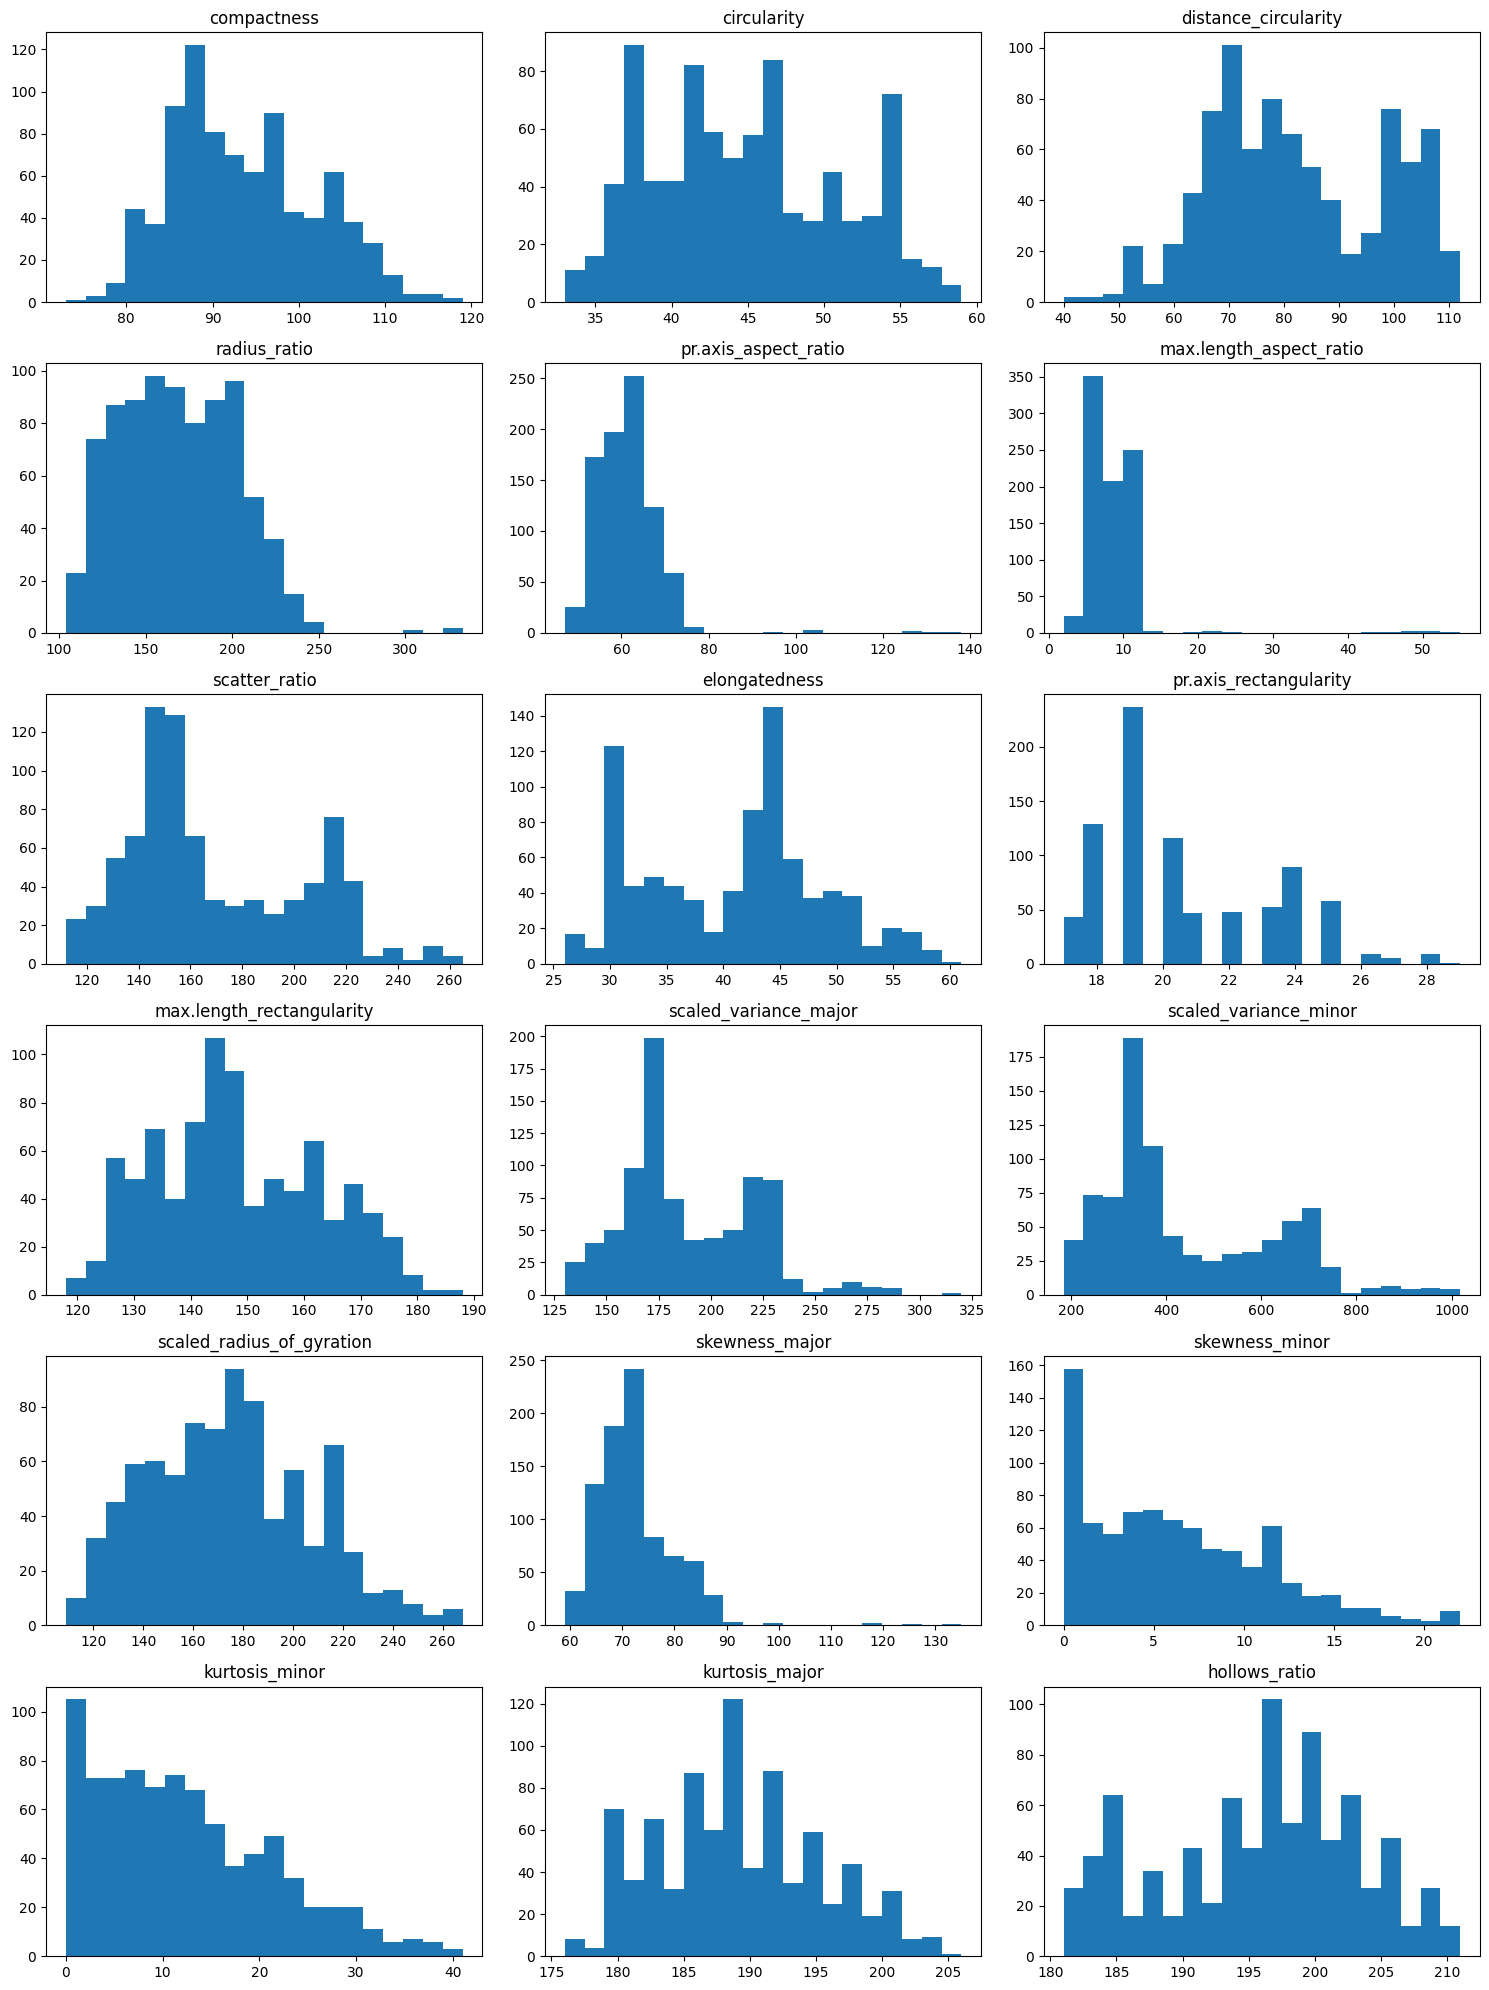

In [16]:
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. Please ensure the file is in the correct path.")
    # Stop execution if file isn't found
    raise

# --- 2. Generate Histograms ---

print("Generating histograms for numerical features...")

# Select all numerical features by dropping the categorical 'class' column
numerical_features = df_veh.drop('class', axis=1)

# Create a grid of histograms for all numerical features
# layout=(6, 3) specifies 6 rows and 3 columns for the 18 features
fig = numerical_features.hist(figsize=(15, 20), bins=20, layout=(6, 3), grid=False)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Save the resulting plot to a file
plt.savefig('feature_histograms.png')

print("Histograms plot saved to 'feature_histograms.png'")

## Box Plots

* While our analysis plan started with univariate analysis, this section transitions into **bivariate analysis**. By plotting each numerical feature *against* the categorical `class` variable, we are no longer looking at features in isolation. Instead, we are actively investigating the relationship between two variables to find out which features are most effective at discriminating between `bus`, `car`, and `van`.

DataFrame 'df_veh' successfully loaded and prepared.
Generating box plots for numerical features by class...
Box plots saved to 'feature_boxplots_by_class.png'


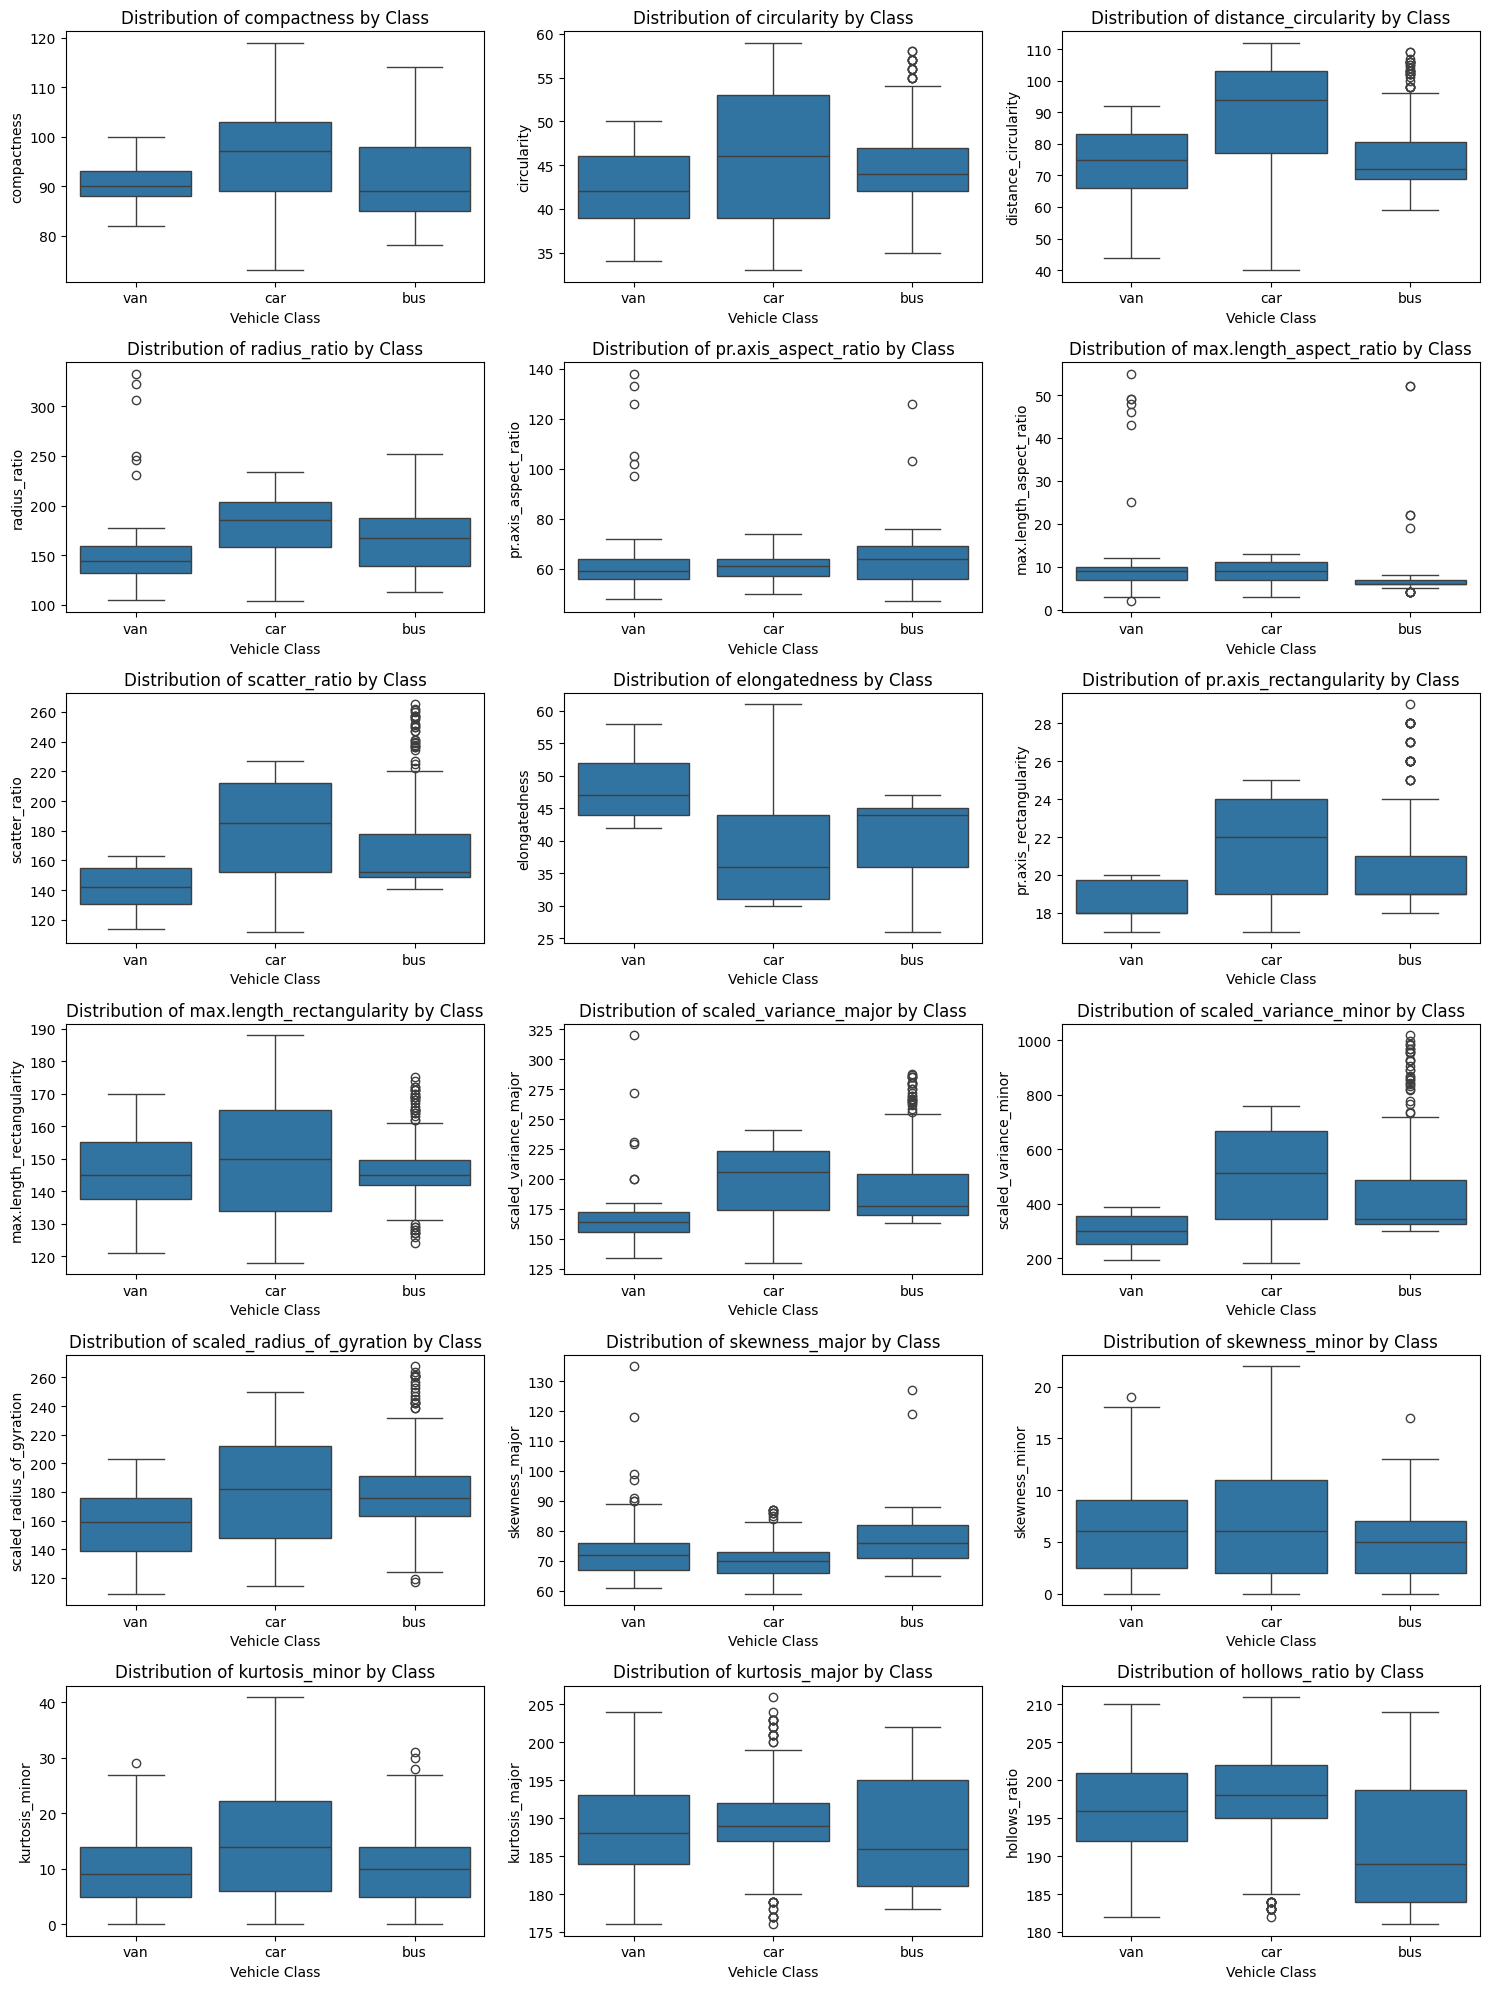

In [17]:
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. Please upload the file again.")
    # Stop execution if file isn't found
    raise

# --- 2. Box Plots Generation (Bivariate) ---

print("Generating box plots for numerical features by class...")

# Get feature columns (all columns except 'class')
numerical_features = df_veh.columns.drop('class')

# Create a figure and a set of subplots (6 rows, 3 columns)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a box plot
for i, col in enumerate(numerical_features):
    sns.boxplot(
        x='class',          # Group by 'class'
        y=col,              # The numerical feature to plot
        data=df_veh,        # The DataFrame
        ax=axes[i]          # Assign to the i-th subplot
    )
    # Set a clear title for each subplot
    axes[i].set_title(f'Distribution of {col} by Class')
    axes[i].set_xlabel('Vehicle Class')
    axes[i].set_ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('feature_boxplots_by_class.png')

print("Box plots saved to 'feature_boxplots_by_class.png'")

##  Density Plots

DataFrame 'df_veh' successfully loaded and prepared.
Generating density plots for numerical features...
Density plots saved to 'feature_density_plots.png'


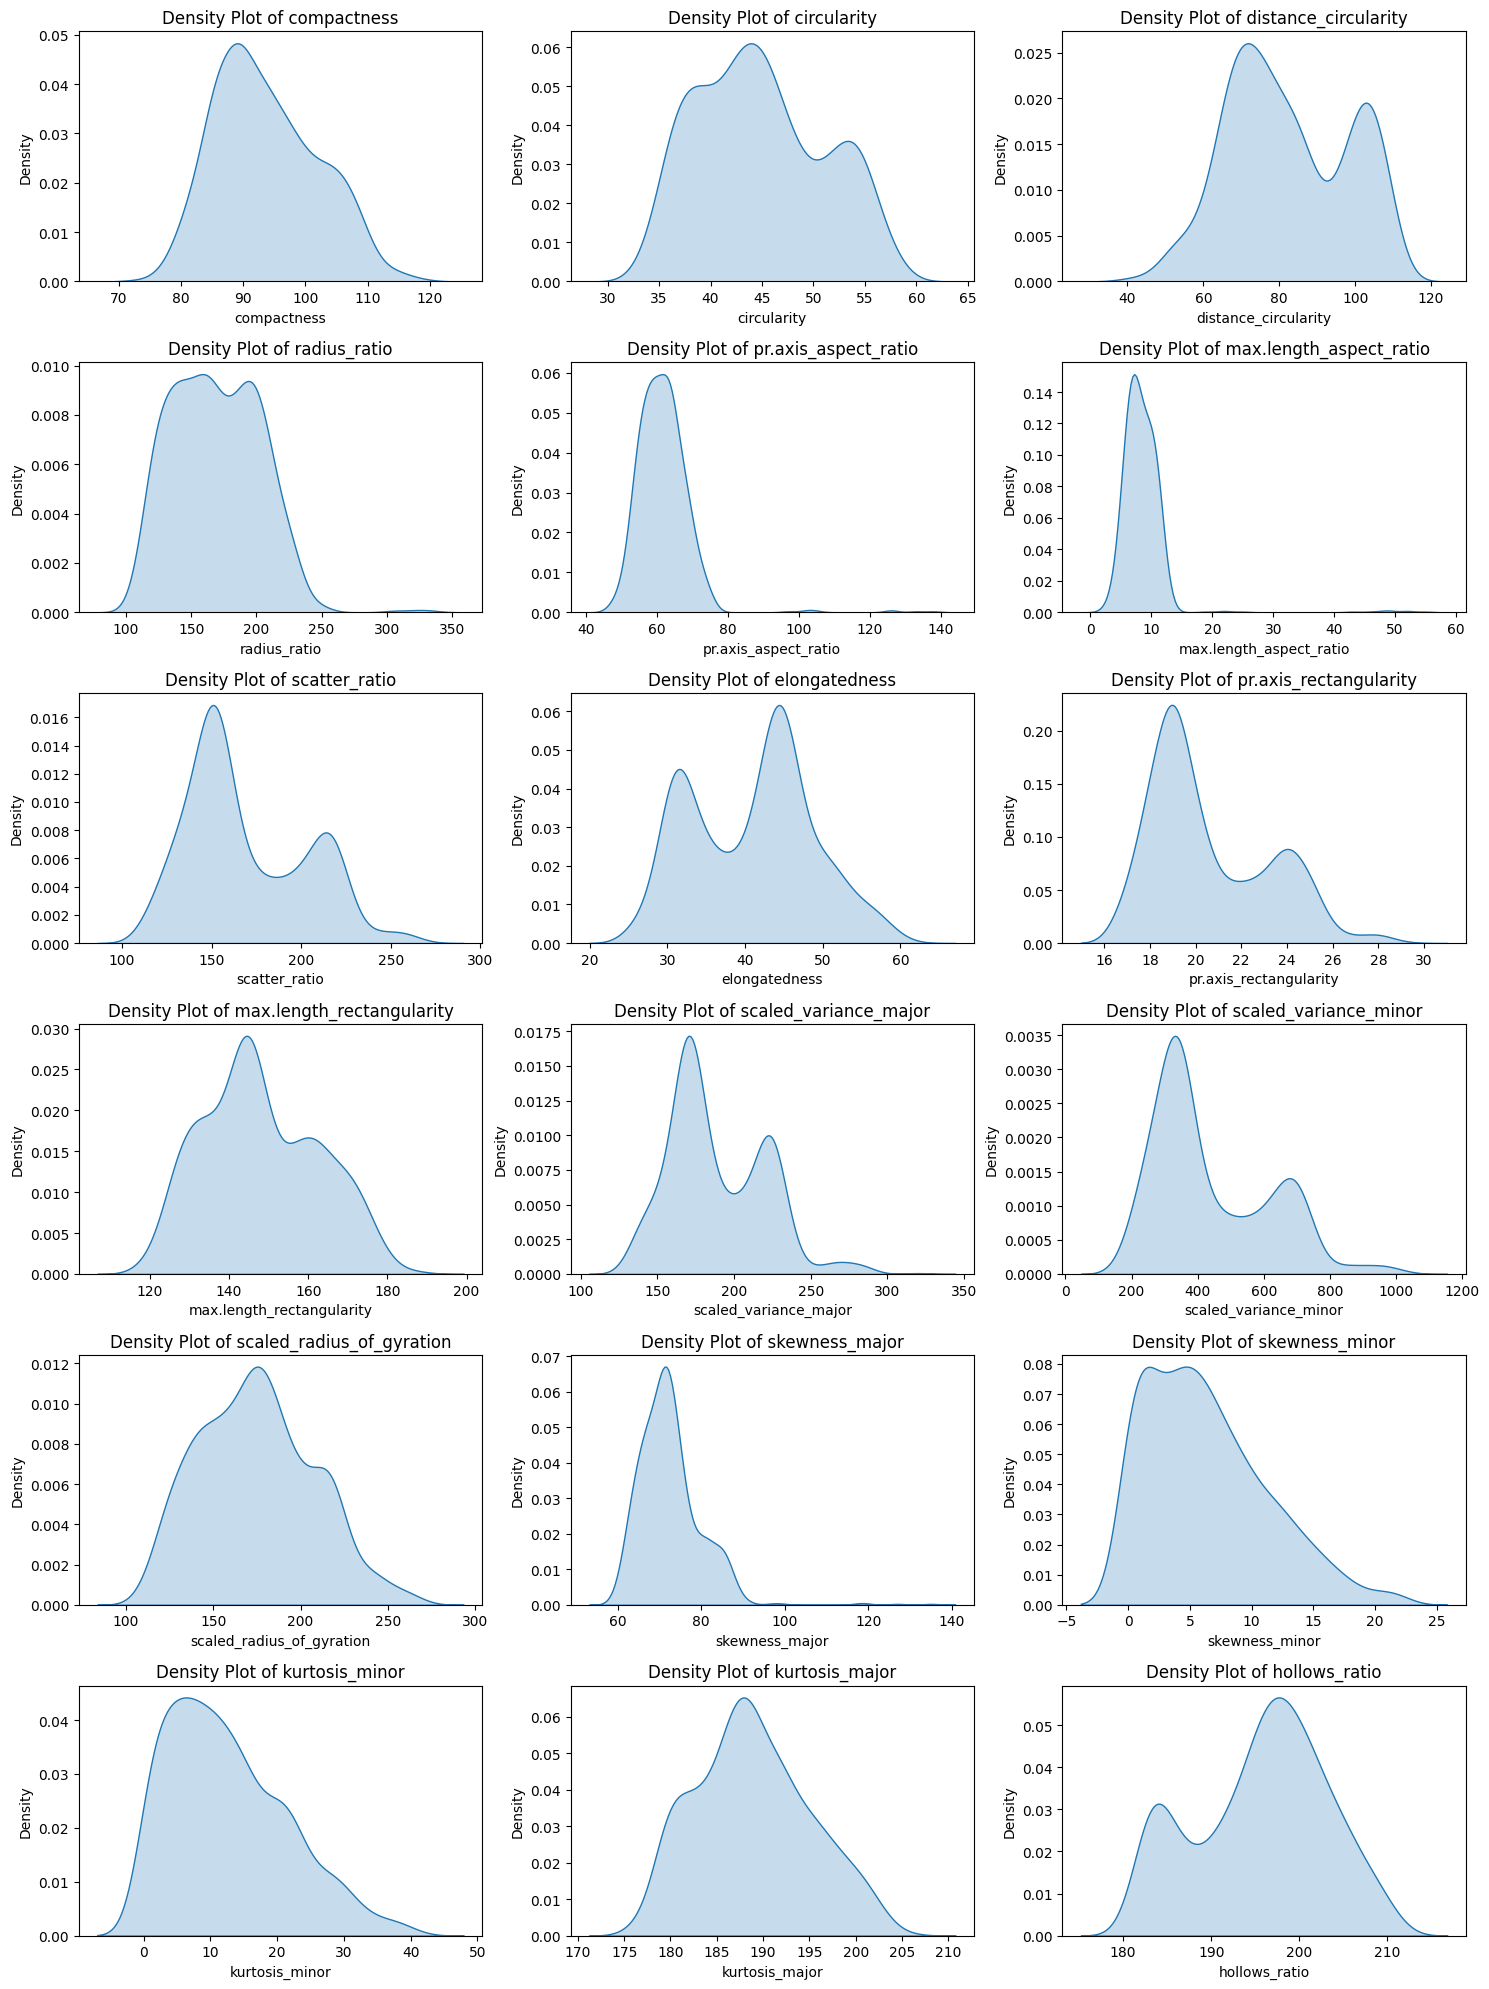

In [18]:
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. Please upload the file again.")
    # Stop execution if file isn't found
    raise

# --- 2. Density Plots Generation (Univariate) ---

print("Generating density plots for numerical features...")

# Get feature columns (all columns except 'class')
numerical_features = df_veh.columns.drop('class')

# Create a figure and a set of subplots (6 rows, 3 columns)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical feature and create a density plot
for i, col in enumerate(numerical_features):
    sns.kdeplot(
        data=df_veh,    # The DataFrame
        x=col,          # The numerical feature to plot
        ax=axes[i],     # Assign to the i-th subplot
        fill=True       # Fill the area under the curve
    )
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig('feature_density_plots.png')

print("Density plots saved to 'feature_density_plots.png'")

# 5. 🔗 Bivariate Analysis (Two Variables)

DataFrame 'df_veh' successfully loaded and prepared.
Calculating correlation matrix for numerical features...
Generating heatmap...
Correlation heatmap saved to 'correlation_heatmap.png'


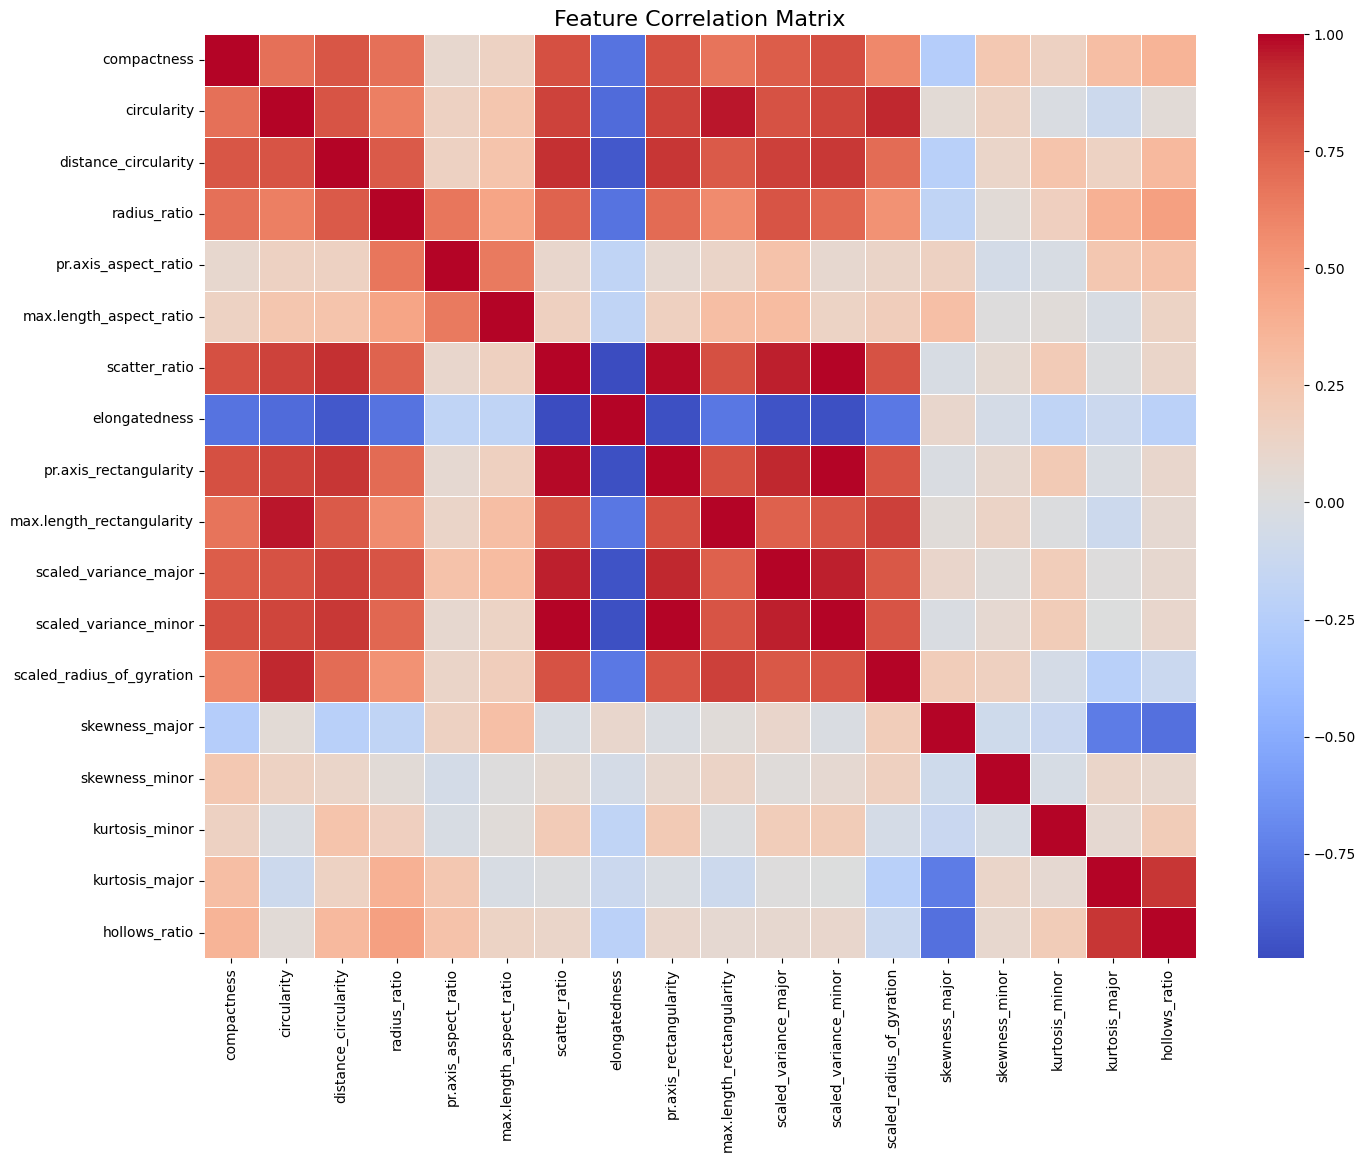

In [19]:
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. This should not happen after a re-upload.")
    raise

# --- 2. Bivariate Analysis: Correlation Matrix ---

print("Calculating correlation matrix for numerical features...")

# Select only numerical features by dropping the 'class' column
numerical_features_df = df_veh.drop('class', axis=1)

# Calculate the Pearson correlation matrix
corr_matrix = numerical_features_df.corr(method='pearson')

# --- 3. Visualization: Heatmap ---

print("Generating heatmap...")

# Set the figure size to be large enough for an 18x18 matrix
plt.figure(figsize=(16, 12))

# Generate the heatmap
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',  # Use a diverging colormap (Red=Positive, Blue=Negative)
    annot=False,      # Do not show numbers (matrix is too large, 18x18)
    linewidths=0.5
)

# Add a title
plt.title('Feature Correlation Matrix', fontsize=16)

# Save the figure
plt.savefig('correlation_heatmap.png')

print("Correlation heatmap saved to 'correlation_heatmap.png'")

In [20]:

try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found. Please upload the file again.")
    raise

# --- 2. Bivariate Analysis: Numerical Aggregation ---

print("\n--- Mean Feature Values by Class (groupby('class').mean()) ---")

# Group the DataFrame by the 'class' column and calculate the mean for all numerical features
mean_values_by_class = df_veh.groupby('class').mean()

print(mean_values_by_class)

DataFrame 'df_veh' successfully loaded and prepared.

--- Mean Feature Values by Class (groupby('class').mean()) ---
       compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus      91.591743    44.981308             76.767442    165.708333   
car      96.184149    46.035047             88.878788    180.591549   
van      90.562814    42.070352             73.247475    147.176768   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus               63.414747                 7.013761     170.022936   
car               60.992991                 8.825175     181.053738   
van               61.261307                 9.713568     141.537688   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus        40.114679 

Generating pairplot for selected features...
Pairplot saved to 'pairplot_key_features.png'


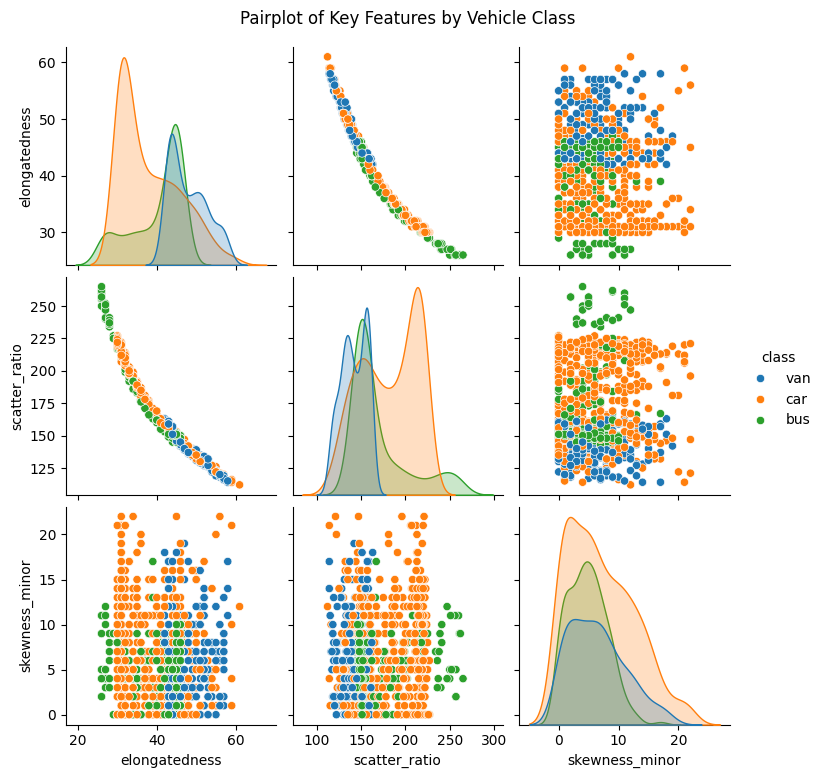

In [21]:

print("Generating pairplot for selected features...")

selected_features = ['elongatedness', 'scatter_ratio', 'skewness_minor', 'class']

try:
    df_pairplot = df_veh[selected_features]
    g = sns.pairplot(df_pairplot, hue='class')
    g.fig.suptitle('Pairplot of Key Features by Vehicle Class', y=1.03)
    plt.savefig('pairplot_key_features.png')

    print("Pairplot saved to 'pairplot_key_features.png'")

except NameError:
    print("Error: 'df_veh' not found in memory.")
    print("This can happen if the runtime was reset.")
    print("Please re-upload 'vehicle.csv' so I can run the setup and create the plot.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# 6. 🌐 Multivariate Analysis (Multiple Variables)

In [22]:


# --- 1. Setup Phase: Load and Prepare Data ---
try:
    df = pd.read_csv("vehicle.csv")

    descriptive_columns = [
        'compactness', 'circularity', 'distance_circularity', 'radius_ratio',
        'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
        'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
        'scaled_variance_major', 'scaled_variance_minor', 'scaled_radius_of_gyration',
        'skewness_major', 'skewness_minor', 'kurtosis_minor', 'kurtosis_major',
        'hollows_ratio', 'class'
    ]
    df.columns = descriptive_columns

    df_veh = df.copy()
    print("DataFrame 'df_veh' successfully loaded and prepared.")

except FileNotFoundError:
    print("Error: 'vehicle.csv' not found.")
    raise

# --- 2. Separate Features (X) and Scale ---
X = df_veh.drop('class', axis=1)
y = df_veh['class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n--- Applying PCA to df_veh (X_scaled) ---")

# --- Run 1: Default solver (n_components=2) ---
# For our data (846 samples, 18 features), 'auto' will select 'full'.
print("\n--- 1. PCA (n_components=2, svd_solver='auto' [default]) ---")
pca_auto = PCA(n_components=2)
pca_auto.fit(X_scaled)
print("Explained Variance Ratio:")
print(pca_auto.explained_variance_ratio_)
print("Singular Values:")
print(pca_auto.singular_values_)

# --- Run 2: 'full' solver (n_components=2) ---
print("\n--- 2. PCA (n_components=2, svd_solver='full') ---")
pca_full = PCA(n_components=2, svd_solver='full')
pca_full.fit(X_scaled)
print("Explained Variance Ratio:")
print(pca_full.explained_variance_ratio_)
print("Singular Values:")
print(pca_full.singular_values_)

# --- Run 3: 'arpack' solver (n_components=1) ---
# 'arpack' is for when n_components < min(n_samples, n_features)
# We use n_components=1 as in your example.
print("\n--- 3. PCA (n_components=1, svd_solver='arpack') ---")
# 'arpack' requires n_components < min(846, 18)
pca_arpack = PCA(n_components=1, svd_solver='arpack')
pca_arpack.fit(X_scaled)
print("Explained Variance Ratio:")
print(pca_arpack.explained_variance_ratio_)
print("Singular Values:")
print(pca_arpack.singular_values_)

DataFrame 'df_veh' successfully loaded and prepared.

--- Applying PCA to df_veh (X_scaled) ---

--- 1. PCA (n_components=2, svd_solver='auto' [default]) ---


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values